<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Natural-Language-Processing/blob/main/Email_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#Importing NLP libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
string.punctuation
import re
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# LOADING DATA

In [ ]:
#Loading data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/spam.csv', 
                 encoding='latin-1')

#Removing unwanted columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

#Rename v1 & v2 columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace=True)

#Data shape
df.shape

(5572, 2)

In [ ]:
#Data glimps
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# ENCODING TARGET VARIABLE

In [ ]:
#Encoding target variable
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
#Data glimps
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#MISSING VALUES

In [ ]:
#Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

No missing values have in the data

# DUPLICATES

In [ ]:
#Checking duplicates
df.duplicated().sum()

403

The data hvae 403 duplicate row which needs to be removed

In [ ]:
#Removing duplicates
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
#Checking duplicates
df.duplicated().sum()

0

In [ ]:
#Checking data shape
df.shape

(5169, 2)

# EDA

In [ ]:
#Checking target variable distribution
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
#Checking target variable distribution in proportion
df['target'].value_counts(normalize=True)*100

0    87.366996
1    12.633004
Name: target, dtype: float64

In target variable, ham email have 87% and spam email have 12%

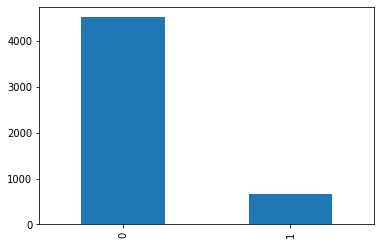

In [ ]:
#Creating bar plot on target variable
df['target'].value_counts().plot(kind='bar');

In [ ]:
#Number of character/alphabets
df['num_char'] = df['text'].apply(len)
#Number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#Number of sentence
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
#Ham five number summary
df.query("target==0")[['num_char', 'num_words', 'num_sentences']].describe().round()

,num_char,num_words,num_sentences
count,4516.0,4516.0,4516.0
mean,70.0,17.0,2.0
std,56.0,13.0,1.0
min,2.0,1.0,1.0
25%,34.0,8.0,1.0
50%,52.0,13.0,1.0
75%,90.0,22.0,2.0
max,910.0,220.0,28.0


In [ ]:
#Spam five number summary
df.query("target==1")[['num_char', 'num_words', 'num_sentences']].describe().round()

,num_char,num_words,num_sentences
count,653.0,653.0,653.0
mean,138.0,28.0,3.0
std,30.0,7.0,1.0
min,13.0,2.0,1.0
25%,132.0,25.0,2.0
50%,149.0,29.0,3.0
75%,157.0,32.0,4.0
max,224.0,46.0,8.0


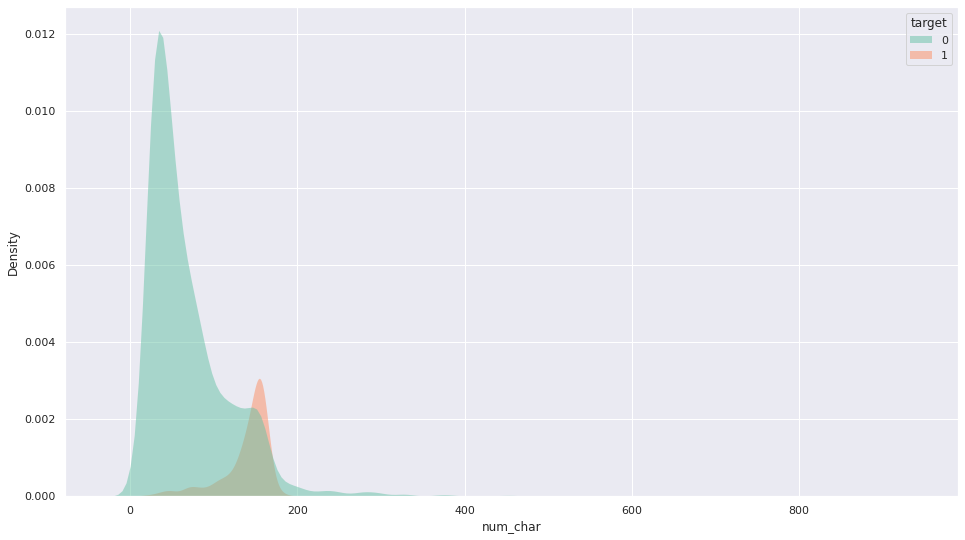

In [ ]:
#Creating distribution plot on ham & spam
plt.figure(figsize=(16,9))
sns.set()
sns.kdeplot(data=df,
            x='num_char',
            hue='target',
            fill=True,
            palette = 'Set2', 
            alpha=.5, 
            linewidth=0);

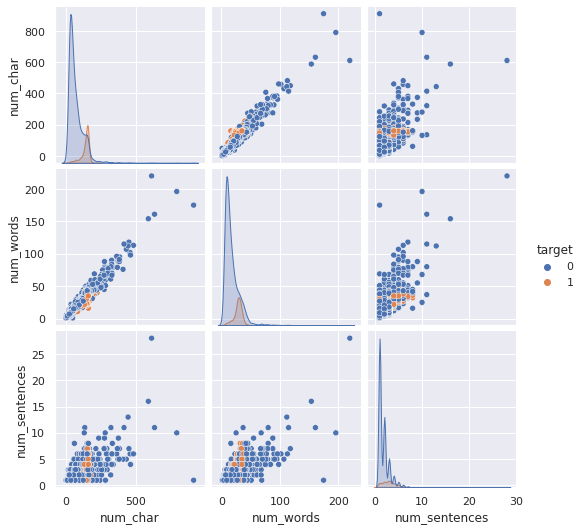

In [ ]:
#Creating pairplot on all features
sns.pairplot(df, hue='target');

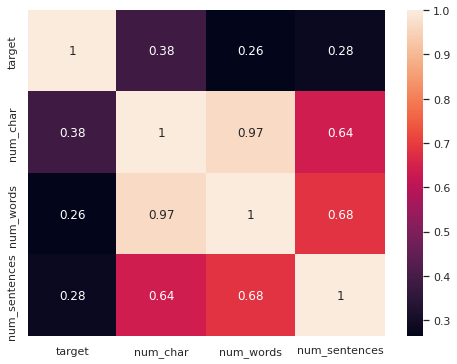

In [ ]:
#Creating correlation plot on all features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True);

Number of words & number of character have very high correlation i.e. 0.97

# DATA PREPROCESSING

In [ ]:
def transform_lower(text):
  text = text.lower()
  return text

def transform_tokenize(text):
  text = nltk.word_tokenize(text)
  return text

# def remove_special_char(text):
#   y = []
#   for i in text:
#     if i.isalnum():
#       y.append(i)
#     elif i not in stopwords.words('english') and i not in string.punctuation:
#       y.append(i)
#   return y

def remove_special_char(text):
  y = []
  for i in text:
    y.append(re.sub('[^A-Za-z0-9]+', '', i))
  return y

def remove_blank_space(text):
  y = []
  for i in text:
    if i!='':
      y.append(i)
  return y

def remove_stopwords_punctuation(text):
  y = []
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  return y

def lem(text):
  y = []
  for i in text:
    y.append(lemmatizer.lemmatize(i,wordnet.VERB))
  return " ".join(y)

def remove_url(text):
  text = re.sub(r'www\S+', '', text)
  return text

In [ ]:
df['transformed_text'] = df['text'].apply(transform_lower)

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(transform_tokenize)

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(remove_special_char)

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(remove_blank_space)

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(remove_stopwords_punctuation)

In [ ]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think go usf live around though


In [ ]:
[i for i in df['transformed_text'].sample(10)]

['askd u question hours answer',
 'ew one',
 'dont want hear anything',
 'thank way lose',
 'think steyn surely get one wicket',
 'important customer service announcement premier',
 'hey really pretty late want go lesson first join reach tp mrt',
 'hey mate speak mag people deliver end month deliver 24th sept talk later',
 'ur cashbalance currently 500 pound maximize ur cashin send go 86688 150pmsg cc 08718720201 po box 11414 tcrw1',
 'haha really oh deduct lesson tmr']

# CREATING WORD CLOUDE

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, 
               height=500, 
               min_font_size=10,
               max_words=100, 
               background_color='white')

Word Cloud on Spam


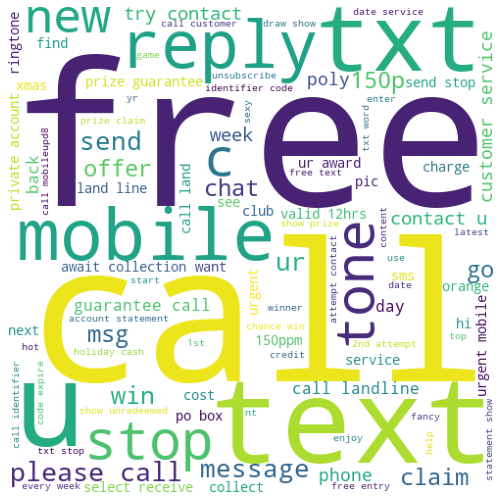

In [ ]:
spam_wc = wc.generate(df[df['target']==1].transformed_text.str.cat(sep=" "))
print('Word Cloud on Spam')
plt.figure(figsize=(16,9))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

Word Cloud on Ham


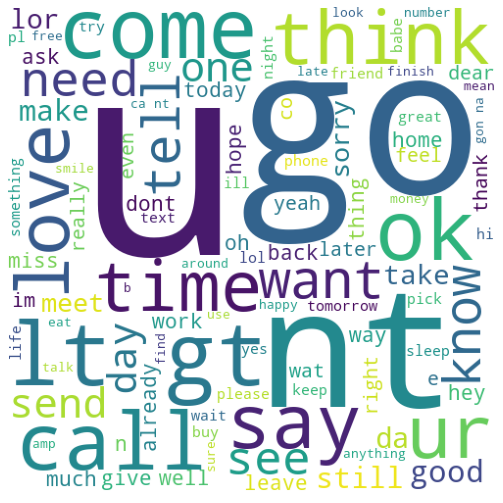

In [ ]:
ham_wc = wc.generate(df[df['target']==0].transformed_text.str.cat(sep=" "))
print('Word Cloud on Ham')
plt.figure(figsize=(16,9))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

In [ ]:
spam_corpus = []
for i in df[df['target']==1]['transformed_text'].tolist():
  for j in i.split():
    spam_corpus.append(j)

In [ ]:
ham_corpus = []
for i in df[df['target']==0]['transformed_text'].tolist():
  for j in i.split():
    ham_corpus.append(j)

In [ ]:
from collections import Counter

In [ ]:
frequient_words_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
frequient_words_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))

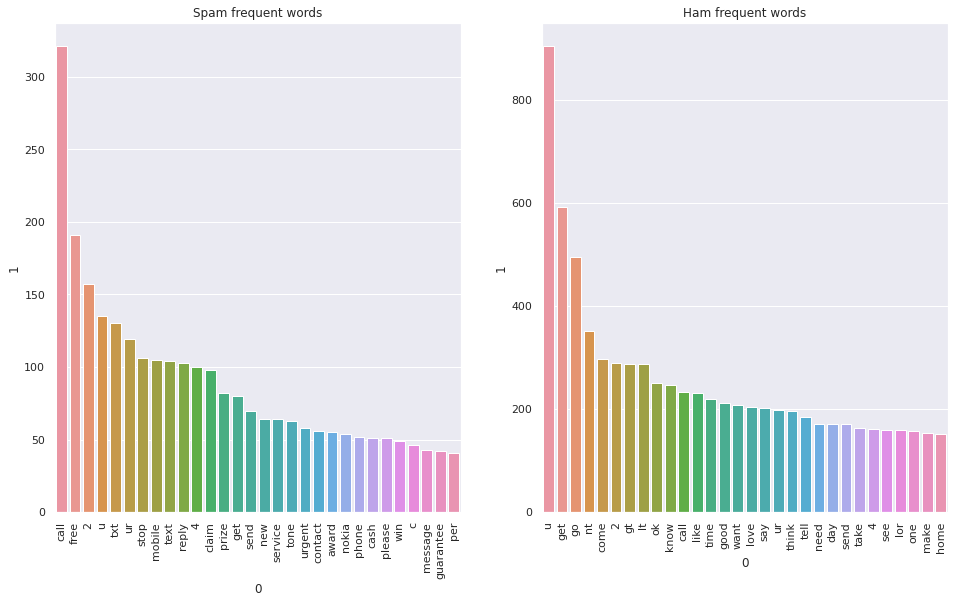

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.barplot(x=frequient_words_spam[0],
            y=frequient_words_spam[1])
plt.title('Spam frequent words')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.barplot(x=frequient_words_ham[0],
            y=frequient_words_ham[1])
plt.title('Ham frequent words')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  

In [ ]:
cv = CountVectorizer()

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487
For  KN
Accuracy -  0.9032882011605415
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9690721649484536
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9541284403669725
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.9545454545454546
Precision -  0.9504950495049505
For  xgb
Accuracy -  0.9429400386847195
Precision -  0.9647058823529412


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903288,1.000000
2,NB,0.973888,1.000000
8,ETC,0.978723,0.983333
5,RF,0.975822,0.982906
4,LR,0.954545,0.969072
0,SVC,0.973888,0.966387
10,xgb,0.942940,0.964706
6,AdaBoost,0.962282,0.954128
9,GBDT,0.954545,0.950495
7,BgC,0.957447,0.867188


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903288
1,NB,Accuracy,0.973888
2,ETC,Accuracy,0.978723
3,RF,Accuracy,0.975822
4,LR,Accuracy,0.954545
5,SVC,Accuracy,0.973888
6,xgb,Accuracy,0.942940
7,AdaBoost,Accuracy,0.962282
8,GBDT,Accuracy,0.954545
9,BgC,Accuracy,0.957447


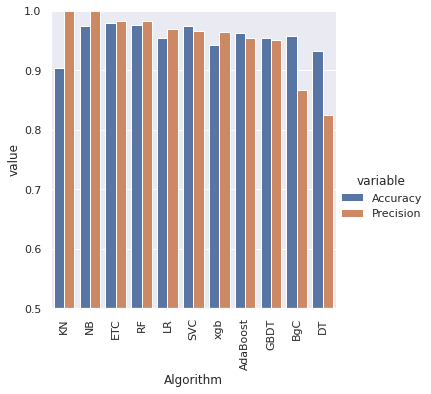

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()